In [16]:
# Future Interns
# Task 3: Students feedback survey analysis

# Part 1: Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Part 2: Import CSV file and check the data and handle null or duplicate values
df=pd.read_csv("Student_Satisfaction_Survey.csv",encoding='latin1')
df.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [19]:
df.tail()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
575,16,9,170,The institute/ teachers use student-centric me...,1,0,0,2,6,4.33 / 86.67,TYBSC,BACHELOR OF SCIENCE
576,17,9,170,Teachers encourage you to participate in extra...,0,0,0,3,6,4.67 / 93.33,TYBSC,BACHELOR OF SCIENCE
577,18,9,170,Efforts are made by the institute/ teachers to...,0,0,1,2,6,4.56 / 91.11,TYBSC,BACHELOR OF SCIENCE
578,19,9,170,What percentage of teachers use ICT tools such...,0,0,1,3,5,4.44 / 88.89,TYBSC,BACHELOR OF SCIENCE
579,20,9,170,The overall quality of the teaching-learning p...,0,0,1,2,6,4.56 / 91.11,TYBSC,BACHELOR OF SCIENCE


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SN                    580 non-null    int64 
 1   Total Feedback Given  580 non-null    int64 
 2   Total Configured      580 non-null    int64 
 3   Questions             580 non-null    object
 4   Weightage 1           580 non-null    int64 
 5   Weightage 2           580 non-null    int64 
 6   Weightage 3           580 non-null    int64 
 7   Weightage 4           580 non-null    int64 
 8   Weightage 5           580 non-null    int64 
 9   Average/ Percentage   580 non-null    object
 10  Course Name           580 non-null    object
 11  Basic Course          580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB


In [24]:
df.drop_duplicates(inplace=True)

In [26]:
# Weightage columns into numeric
weight_cols = [
    'Weightage 1',
    'Weightage 2',
    'Weightage 3',
    'Weightage 4',
    'Weightage 5'
]
df[weight_cols] = df[weight_cols].apply(pd.to_numeric, errors='coerce')
df.fillna(0, inplace=True)

In [27]:
# Partition analysis
df['Feedback_Percentage'] = (
    df['Total Feedback Given'] / df['Total Configured']
) * 100

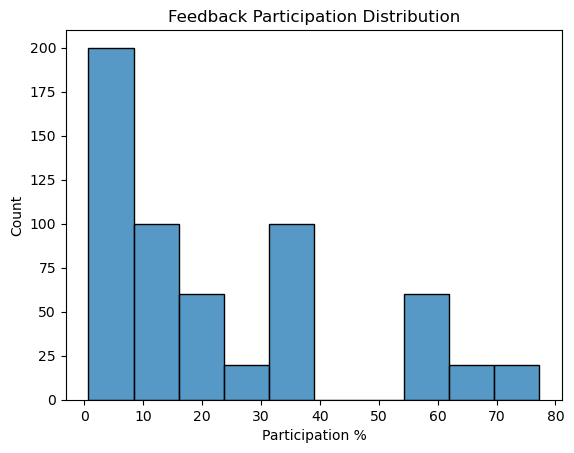

In [29]:
# Partition plot
sns.histplot(df['Feedback_Percentage'], bins=10)
plt.title("Feedback Participation Distribution")
plt.xlabel("Participation %")
plt.show()

In [30]:
# Weighted average score
weights = np.array([1, 2, 3, 4, 5])

df['Total_Responses'] = df[weight_cols].sum(axis=1)

df['Weighted_Average'] = (
    df[weight_cols].values @ weights
) / df['Total_Responses']

In [31]:
# Satisfaction classification
def classify(score):
    if score >= 4.2:
        return "Excellent"
    elif score >= 3.5:
        return "Good"
    elif score >= 2.5:
        return "Average"
    else:
        return "Poor"

df['Satisfaction_Level'] = df['Weighted_Average'].apply(classify)

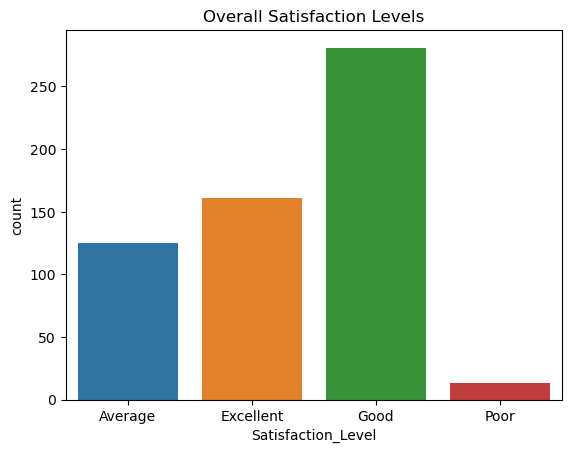

In [32]:
sns.countplot(x='Satisfaction_Level', data=df)
plt.title("Overall Satisfaction Levels")
plt.show()

In [38]:
# Average rating per course
course_scores = (
    df.groupby('Course Name ')['Weighted_Average']
      .mean()
      .sort_values(ascending=False)
)
#print(df.columns.tolist()) #Course Name column has extra space so it is throwing error

In [39]:
df.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course,Feedback_Percentage,Total_Responses,Weighted_Average,Satisfaction_Level
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,8.333333,1,3.0,Average
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,8.333333,1,5.0,Excellent
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,8.333333,1,5.0,Excellent
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,8.333333,1,3.0,Average
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,8.333333,1,4.0,Good


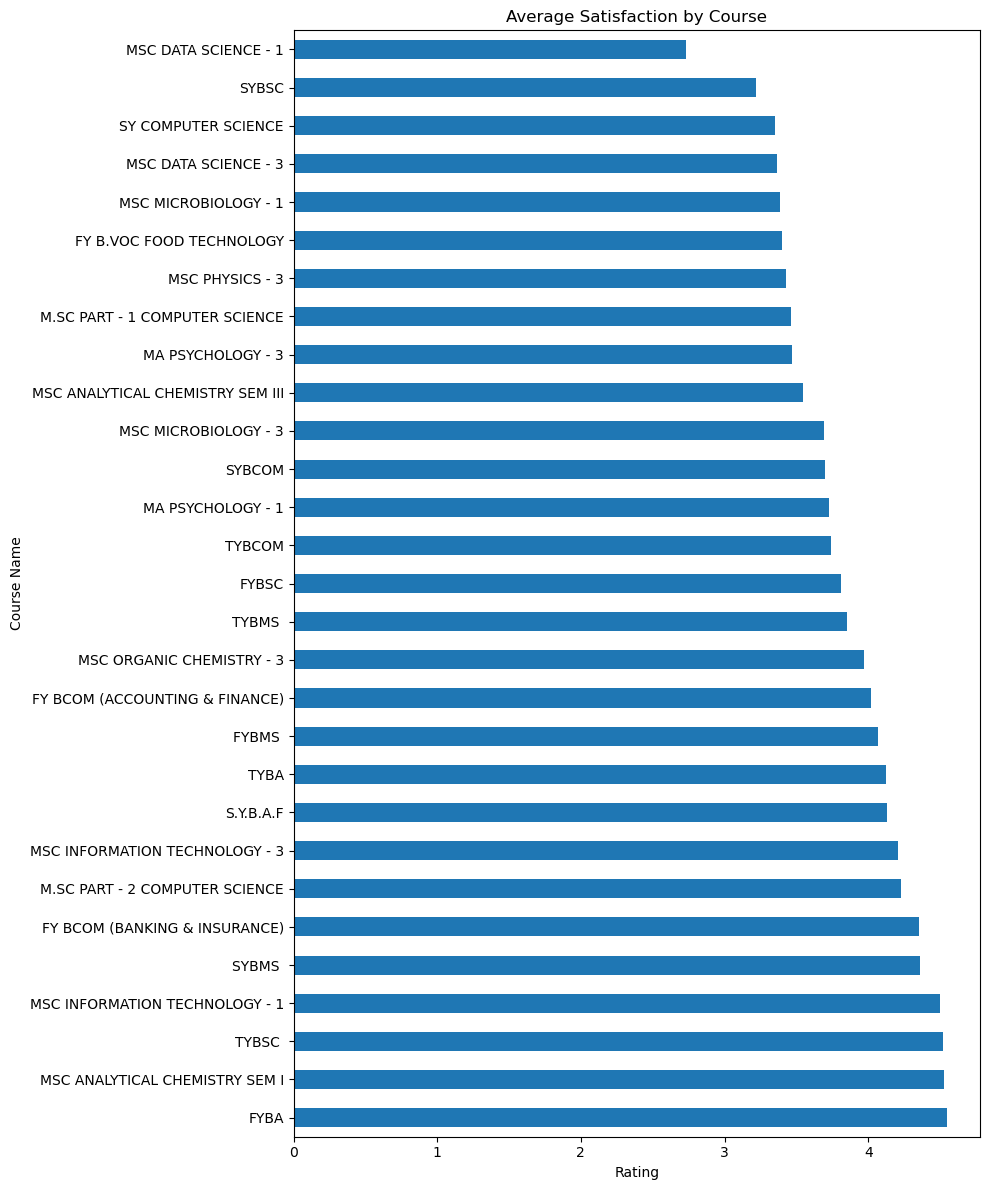

In [44]:
course_scores.plot(kind='barh', figsize=(10,12))
plt.title("Average Satisfaction by Course")
plt.xlabel("Rating")
plt.ylabel("Course Name")
plt.tight_layout()
plt.show()

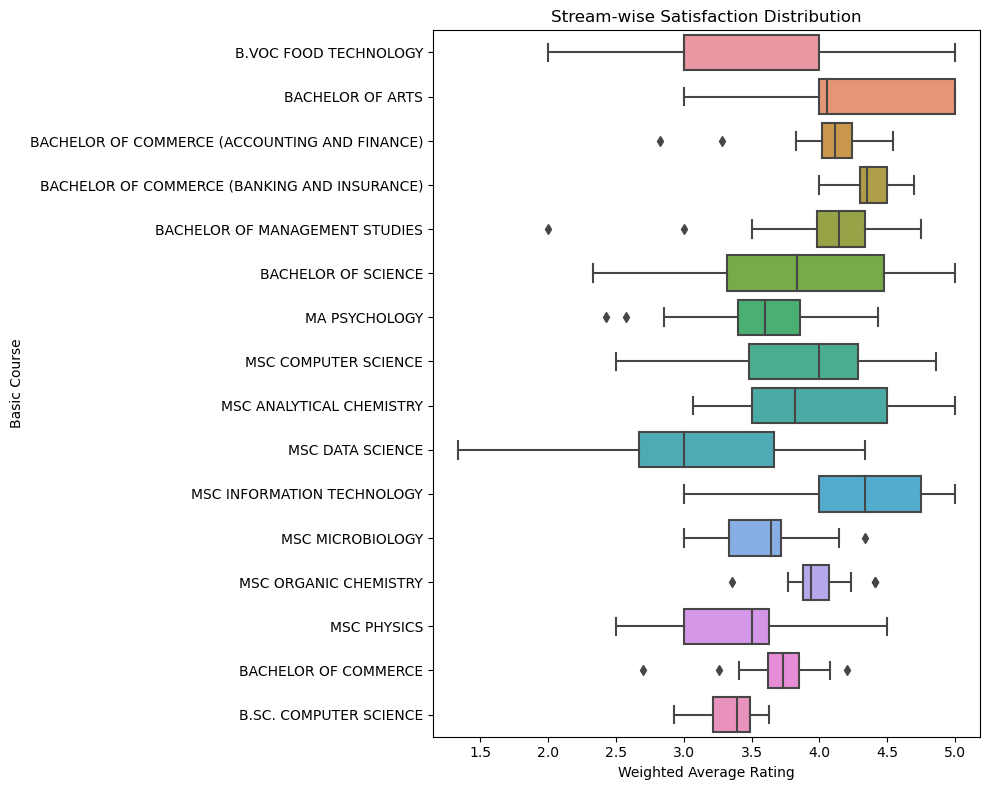

In [46]:
plt.figure(figsize=(10, 8))

sns.boxplot(
    y='Basic Course',
    x='Weighted_Average',
    data=df
)

plt.title("Stream-wise Satisfaction Distribution")
plt.xlabel("Weighted Average Rating")
plt.ylabel("Basic Course")
plt.tight_layout()
plt.show()

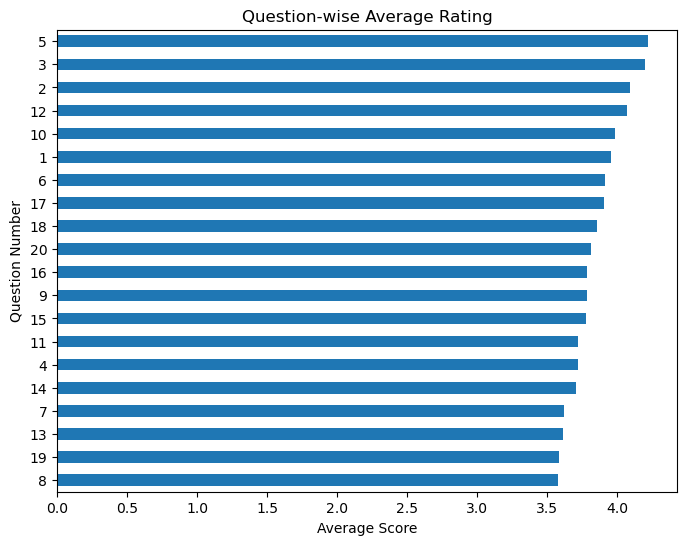

In [49]:
question_avg = (
    df.groupby('SN')['Weighted_Average']
      .mean()
      .sort_values()
)

question_avg.plot(kind='barh', figsize=(8,6))
plt.title("Question-wise Average Rating")
plt.ylabel("Question Number")
plt.xlabel("Average Score")
plt.show()

In [50]:
df['Reliability'] = np.where(
    df['Feedback_Percentage'] >= 60,
    'High',
    'Low'
)

In [51]:
df['Action'] = np.where(
    (df['Feedback_Percentage'] >= 60) & (df['Weighted_Average'] >= 4),
    'Maintain',
    np.where(
        (df['Feedback_Percentage'] >= 60),
        'Improve Quality',
        np.where(
            df['Weighted_Average'] >= 4,
            'Increase Participation',
            'Critical Attention'
        )
    )
)

In [53]:
course_variability = df.groupby('Course Name ')['Weighted_Average'].agg(['mean','std'])
course_variability.sort_values('std', ascending=False)

,mean,std
Course Name,,
FY B.VOC FOOD TECHNOLOGY,3.400000,0.940325
MSC DATA SCIENCE - 1,2.733333,0.689096
MSC PHYSICS - 3,3.425000,0.634014
MSC DATA SCIENCE - 3,3.366667,0.620319
TYBMS,3.850000,0.614517
FYBA,4.550000,0.604805
M.SC PART - 1 COMPUTER SCIENCE,3.462500,0.580806
MSC INFORMATION TECHNOLOGY - 1,4.500000,0.512989
MSC ANALYTICAL CHEMISTRY SEM I,4.525000,0.499342


In [54]:
question_impact = (
    df.groupby('Questions')['Weighted_Average']
      .mean()
)

gap = question_impact.max() - question_impact

gap.sort_values(ascending=False).head(5)

Questions
The teaching and mentoring process in your institution facilitates you in cognitive, social and\nemotional growth.            0.635946
What percentage of teachers use ICT tools such as LCD projectors, Multimedia, etc. while teaching?                            0.630770
The teachers identify your strengths and encourage you to provide the proper level of challenges.                             0.599639
The institute takes an active interest in promoting internships, student exchange, field visit opportunities for students.    0.596101
Teachers are able to identify your weaknesses and help you to overcome them.                                                  0.510858
Name: Weighted_Average, dtype: float64

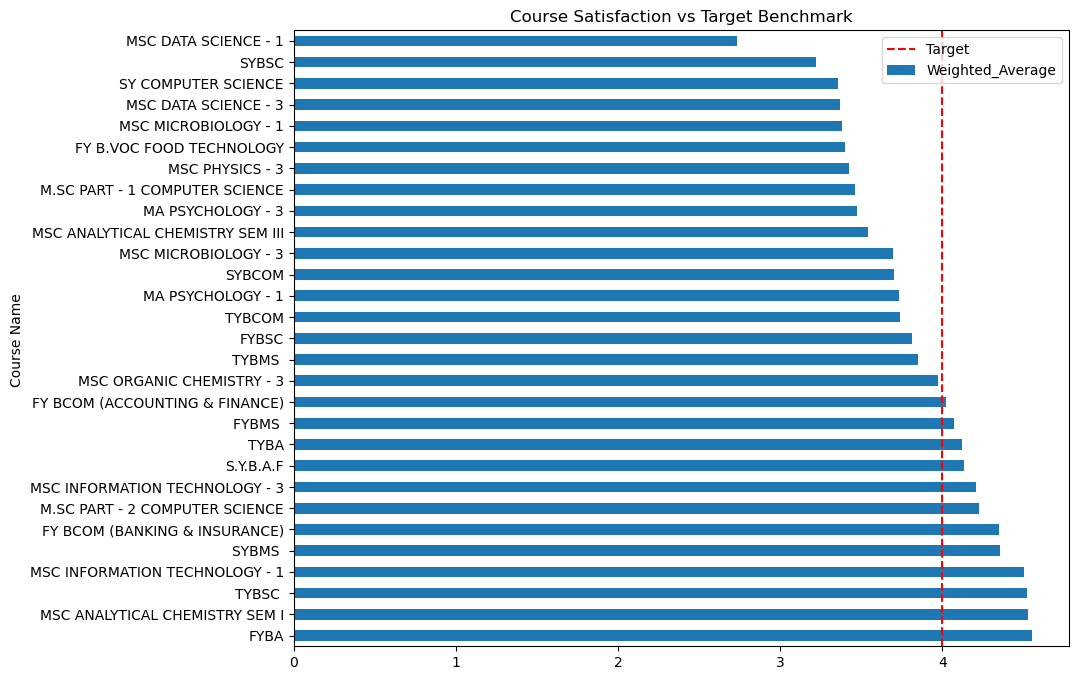

In [55]:
course_scores.plot(kind='barh', figsize=(10,8))
plt.axvline(4.0, color='red', linestyle='--', label='Target')
plt.legend()
plt.title("Course Satisfaction vs Target Benchmark")
plt.show()